In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [425]:
data=pd.read_csv("input_data.csv")
data.head(10)

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
5,188.00,2221,Under Construction,3,3.0,0.0,Virugambakkam,Traventure Homes Pvt Ltd
6,38.00,885,Under Construction,3,NaN,0.0,Thirumazhisai,Urbanrise
7,72.99,936,Ready to move,3,NaN,6.0,Moolakadai,Navin Housing Properties P LTD
8,125.00,2275,Ready to move,4,NaN,1.0,Ottiyambakkam,Jones foundation private limited
9,24.56,622,Under Construction,2,NaN,0.0,Perungalathur,Isha Homes


In [426]:
data.isna().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [427]:
data.shape

(2620, 8)

In [428]:
data=data.dropna(subset=["bathroom"])

In [429]:
data.isna().sum()

price         0
area          0
status        0
bhk           0
bathroom      0
age         823
location      0
builder       0
dtype: int64

In [430]:
data.shape

(1403, 8)

In [431]:
data.columns

Index(['price', 'area', 'status', 'bhk', 'bathroom', 'age', 'location',
       'builder'],
      dtype='object')

In [432]:
data.describe

<bound method NDFrame.describe of        price  area  ...       location                               builder
1      93.54  1346  ...       Selaiyur                         DAC Promoters
3      49.00  1028  ...       Ambattur                Dugar Housing Builders
4      42.28   588  ...     Pallavaram  Radiance Realty Developers India Ltd
5     188.00  2221  ...  Virugambakkam              Traventure Homes Pvt Ltd
11    240.00  1500  ...     Anna Nagar            Pushkar Properties Pvt Ltd
...      ...   ...  ...            ...                                   ...
2615   27.50   750  ...    Veppampattu              Velan Housing Properties
2616   27.50   750  ...    Veppampattu              Velan Housing Properties
2617   30.00   800  ...    Veppampattu              Velan Housing Properties
2618   31.50   850  ...    Veppampattu              Velan Housing Properties
2619   34.00   900  ...    Veppampattu              Velan Housing Properties

[1403 rows x 8 columns]>

In [433]:
temp= data[['price', 'area', 'status', 'bhk', 'bathroom']].values
st = preprocessing.LabelEncoder()
st.fit(['Under Construction','Ready to move'])
temp[:,2] = st.transform(temp[:,2])
temp[0:10]

array([[93.54, 1346, 1, 3, 2.0],
       [49.0, 1028, 0, 2, 2.0],
       [42.28, 588, 1, 2, 1.0],
       [188.0, 2221, 1, 3, 3.0],
       [240.0, 1500, 0, 3, 3.0],
       [113.0, 2343, 0, 4, 4.0],
       [50.76, 1045, 0, 2, 2.0],
       [57.5, 920, 1, 2, 1.0],
       [42.28, 588, 1, 2, 1.0],
       [50.21, 1152, 0, 2, 3.0]], dtype=object)

In [434]:
x = temp[:,1:]
x[0:10]

array([[1346, 1, 3, 2.0],
       [1028, 0, 2, 2.0],
       [588, 1, 2, 1.0],
       [2221, 1, 3, 3.0],
       [1500, 0, 3, 3.0],
       [2343, 0, 4, 4.0],
       [1045, 0, 2, 2.0],
       [920, 1, 2, 1.0],
       [588, 1, 2, 1.0],
       [1152, 0, 2, 3.0]], dtype=object)

In [435]:
y=temp[:,0]
y[0:10]

array([93.54, 49.0, 42.28, 188.0, 240.0, 113.0, 50.76, 57.5, 42.28, 50.21],
      dtype=object)

In [436]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [437]:
x_train.shape

(982, 4)

In [438]:
x_test.shape

(421, 4)

In [439]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

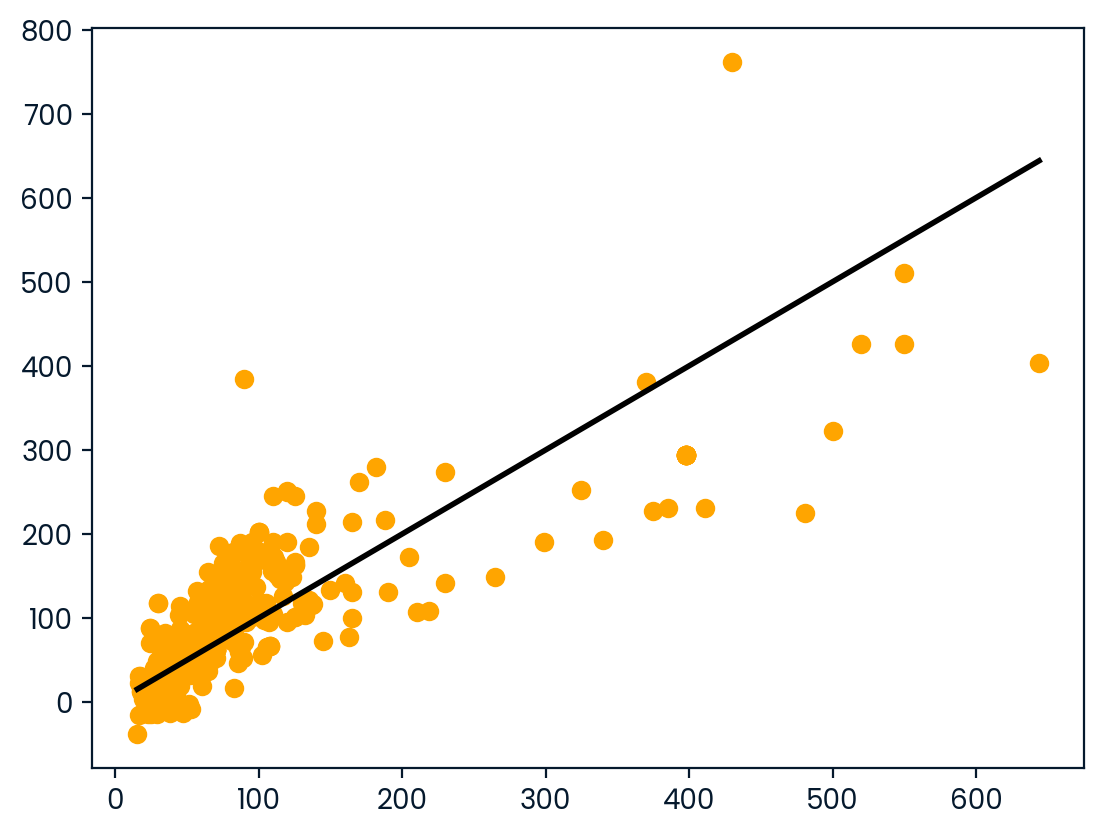

In [440]:
plt.scatter(y_test, y_pred, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linewidth=2)
plt.show()


In [441]:
print(metrics.root_mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

54.851679012797014
0.6401311022708127


In [442]:
print(y_pred.shape)
print(y_test.shape)

(421,)
(421,)


In [443]:
# Convert the numpy arrays to a pandas DataFrame
y_pred_df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

# Save the DataFrame to a CSV file
y_pred_df.to_csv("Output_data.csv", index=False)